# **Task 1: Email Spam Classification**

Build a machine learning model to classify emails as spam or not spam using a
labeled dataset. Your job is to preprocess the email text data, extract important
features, and train a model to accurately identify spam emails. Finally, evaluate
your model’s performance.

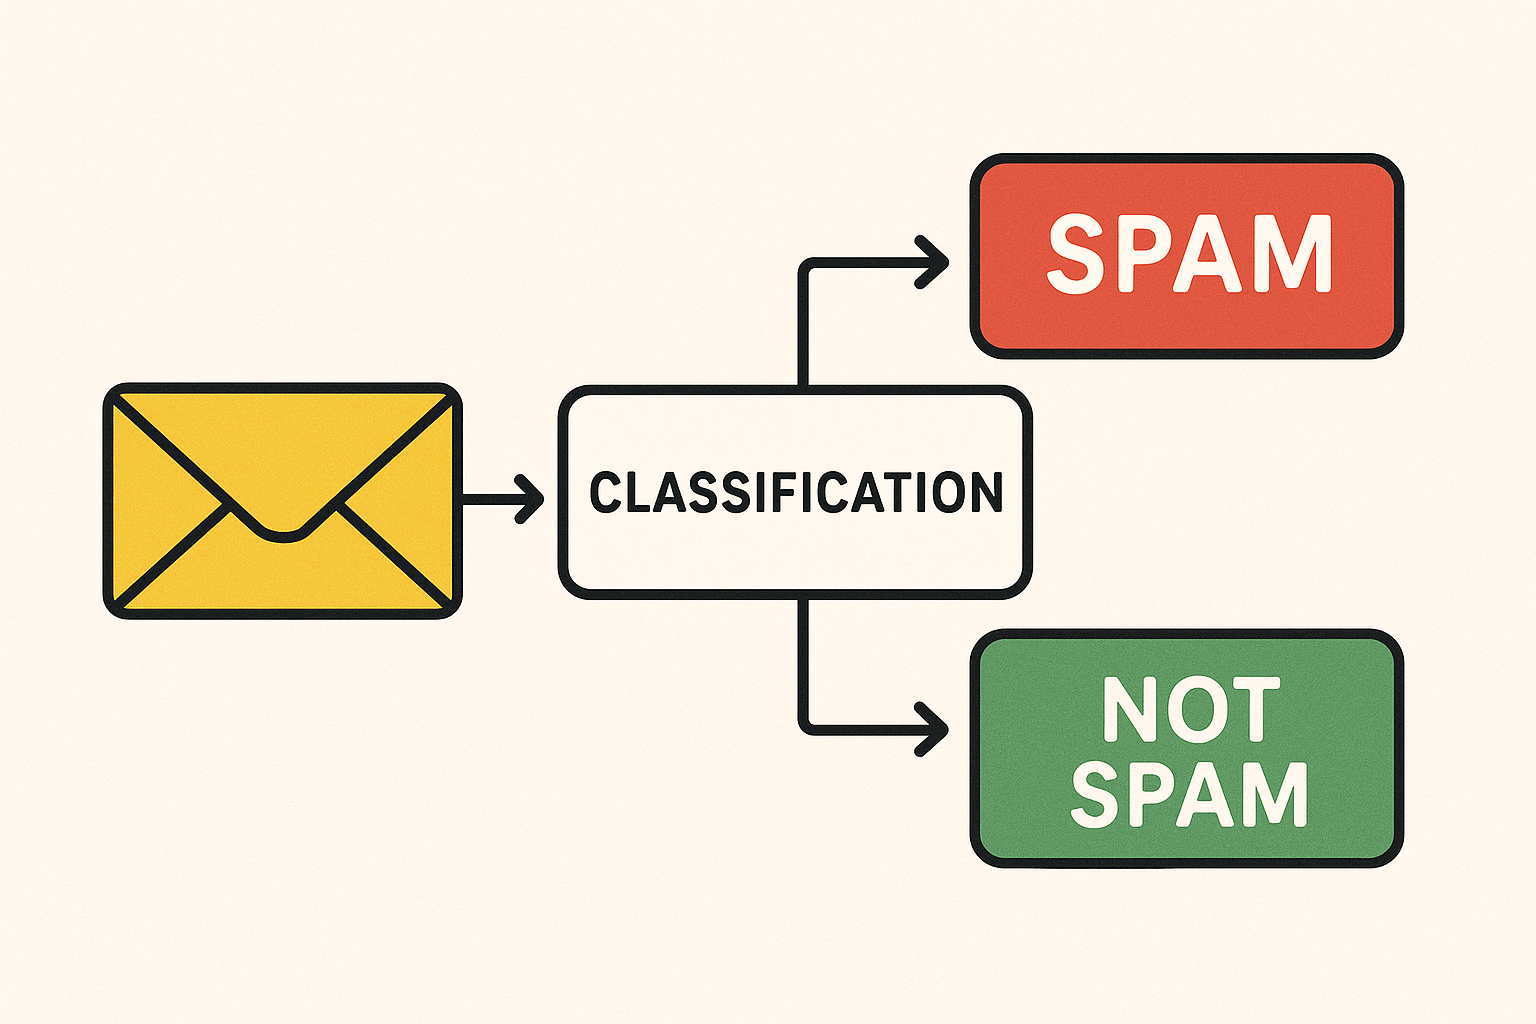

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/email-spam-classification-dataset-csv


In [ ]:
import kagglehub
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

# Full path to the CSV file
csv_path = f"{path}/emails.csv"

# Load dataset into a DataFrame
df = pd.read_csv(csv_path)

# Show first few rows
print(df.head())

# Optional: check info
print(df.info())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries

In [ ]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(5172, 3002)

In [ ]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


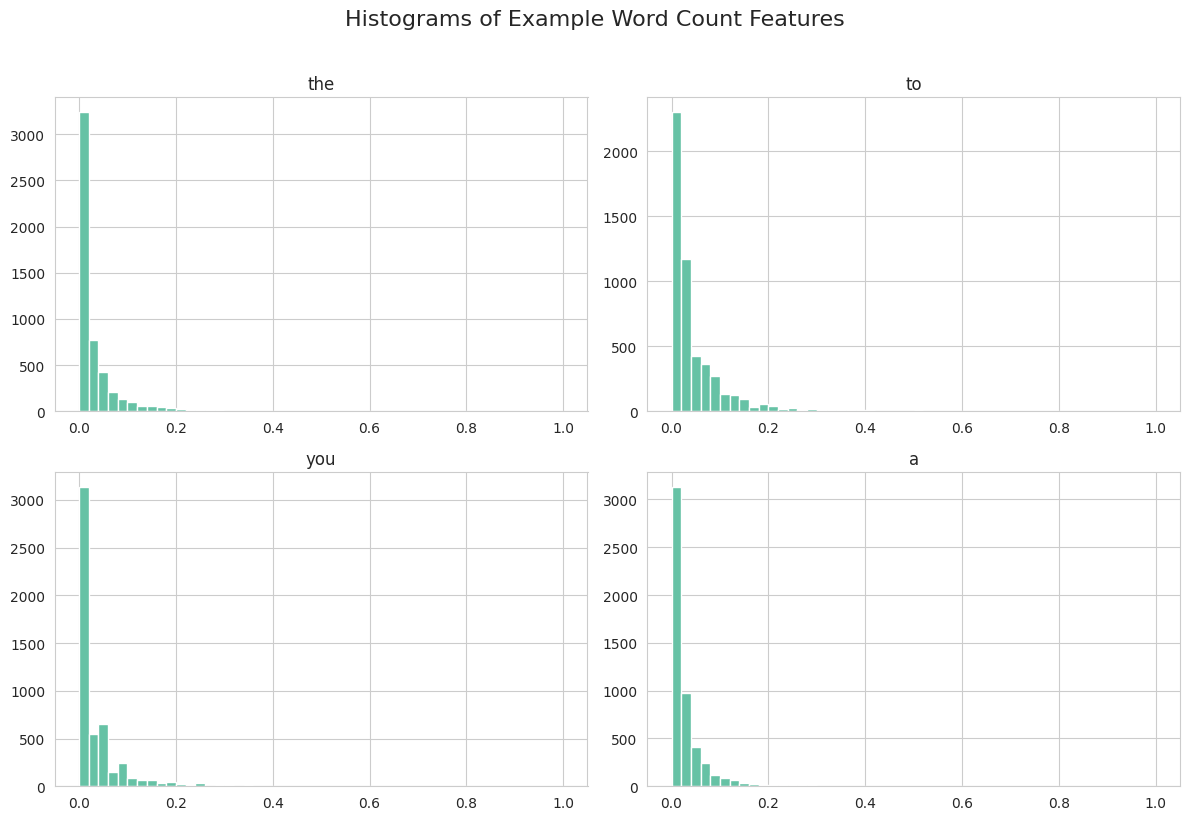

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few word count columns for demonstration
example_cols = ['the', 'to', 'you', 'a']

# Create histograms for the selected columns
df[example_cols].hist(figsize=(12, 8), bins=50)
plt.suptitle('Histograms of Example Word Count Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

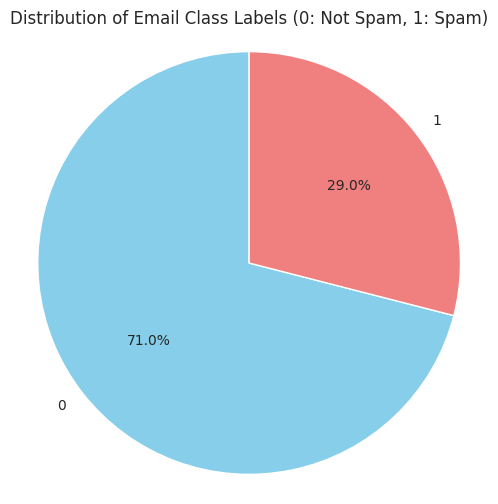

In [ ]:
# Get the counts of each class in the 'Prediction' column
class_counts = df['Prediction'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Email Class Labels (0: Not Spam, 1: Spam)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

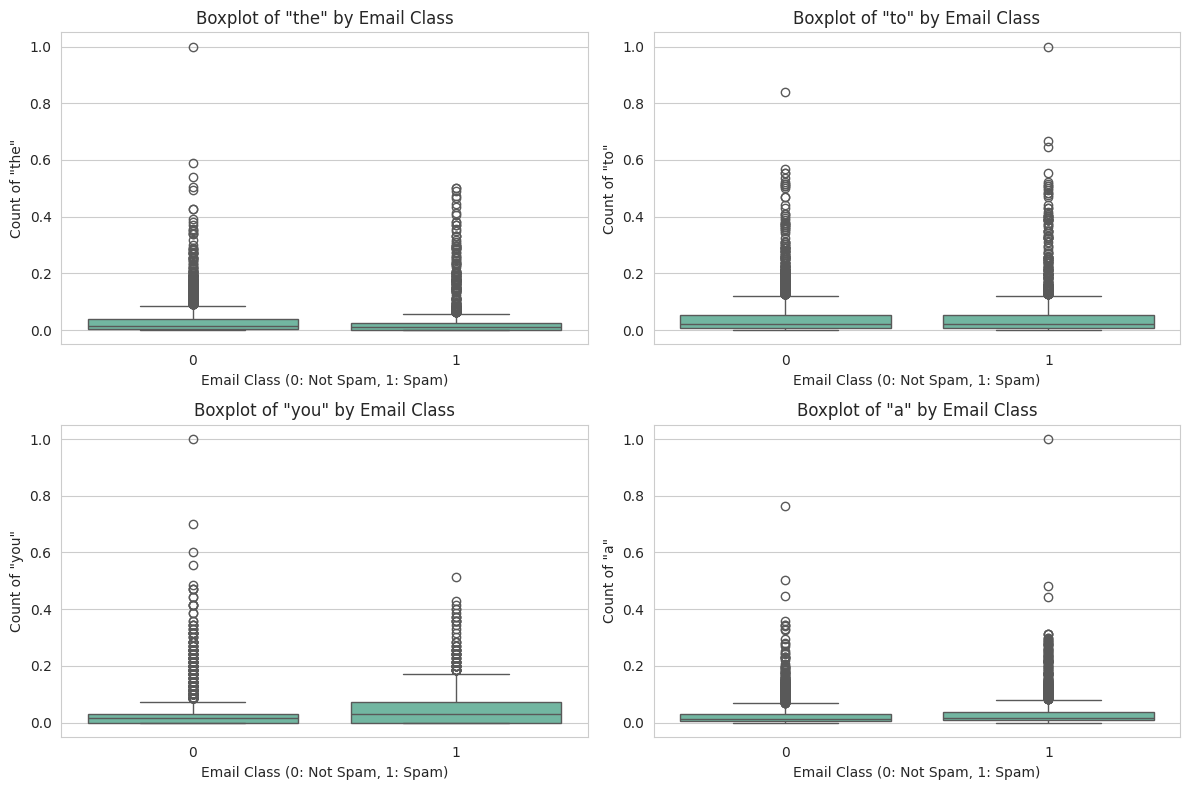

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few word count columns for demonstration
example_cols = ['the', 'to', 'you', 'a']

# Create boxplots for the selected columns, separated by the 'Prediction' class
plt.figure(figsize=(12, 8))
for i, col in enumerate(example_cols):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.boxplot(x='Prediction', y=col, data=df)
    plt.title(f'Boxplot of "{col}" by Email Class')
    plt.xlabel('Email Class (0: Not Spam, 1: Spam)')
    plt.ylabel(f'Count of "{col}"')

plt.tight_layout()
plt.show()

In [ ]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print("Number of duplicate rows after dropping:", df.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after dropping: 0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


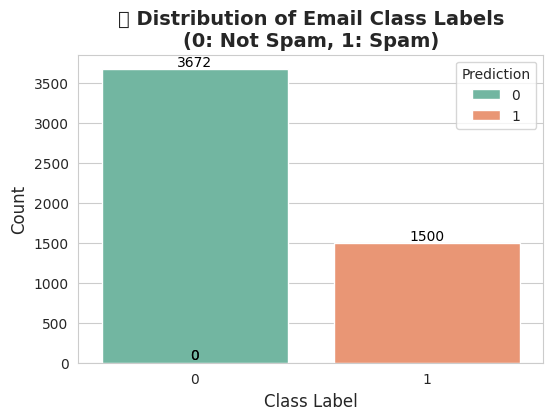

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a colorful theme
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Plot the distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='Prediction',
    data=df,
    hue='Prediction',      # Different colors for each class
    dodge=False            # Keep bars side-by-side for each class
)

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
plt.title('📊 Distribution of Email Class Labels\n(0: Not Spam, 1: Spam)', fontsize=14, fontweight='bold')
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns (excluding 'Email No.' and 'Prediction')
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Prediction') # Remove the target variable
if 'Email No.' in numerical_cols:
    numerical_cols.remove('Email No.') # Remove the identifier column


df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows after scaling
print("DataFrame after Min-Max Scaling:")
display(df.head())

DataFrame after Min-Max Scaling:


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,Email 2,0.038095,0.098485,0.067055,0.067416,0.127660,0.025974,0.053741,0.014286,0.161677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0
2,Email 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,Email 4,0.000000,0.037879,0.061224,0.000000,0.106383,0.012987,0.026870,0.028571,0.059880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
4,Email 5,0.033333,0.045455,0.046647,0.011236,0.106383,0.025974,0.030032,0.000000,0.053892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0


In [ ]:
# Drop the 'Email No.' column
df.drop('Email No.', axis=1, inplace=True)

# Display the first few rows after dropping the column
print("DataFrame after dropping 'Email No.' column:")
display(df.head())

DataFrame after dropping 'Email No.' column:


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,0.038095,0.098485,0.067055,0.067416,0.127660,0.025974,0.053741,0.014286,0.161677,0.080717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,0.017937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,0.000000,0.037879,0.061224,0.000000,0.106383,0.012987,0.026870,0.028571,0.059880,0.004484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
4,0.033333,0.045455,0.046647,0.011236,0.106383,0.025974,0.030032,0.000000,0.053892,0.013453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0


In [ ]:
x =df.drop(columns='Prediction',axis=1)
y =df['Prediction']

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier()
Model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = Model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f""" The Accuracy : {accuracy * 100:.2f}%""")

 The Accuracy : 97.04%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.94      0.96      0.95       455

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.96      1552
weighted avg       0.97      0.97      0.97      1552



In [ ]:
print(f"Train Score : {Model.score(x_train, y_train) * 100:.2f}%")
print(f"Test Score  : {Model.score(x_test, y_test) * 100:.2f}%")

Train Score : 100.00%
Test Score  : 97.04%


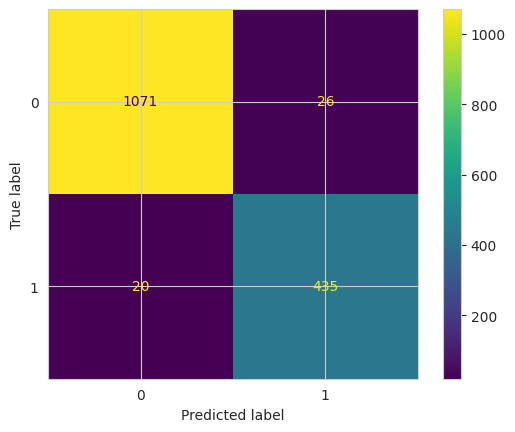

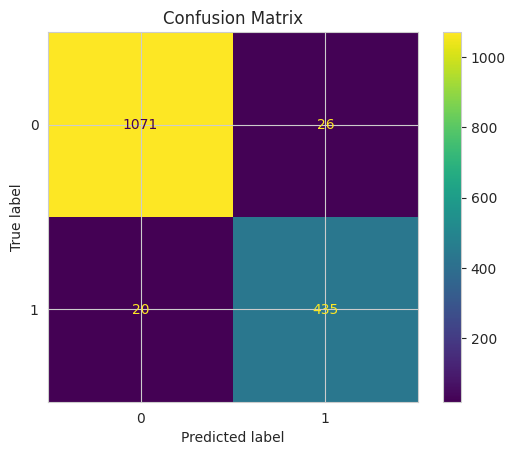

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display the confusion matrix using the trained model and test data
disp = ConfusionMatrixDisplay.from_estimator(Model, x_test, y_test)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3) # You can adjust the number of neighbors

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
print("KNN Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Classifier Performance:
Accuracy: 0.8588917525773195

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1097
           1       0.69      0.93      0.79       455

    accuracy                           0.86      1552
   macro avg       0.83      0.88      0.84      1552
weighted avg       0.89      0.86      0.86      1552


Confusion Matrix:
 [[909 188]
 [ 31 424]]


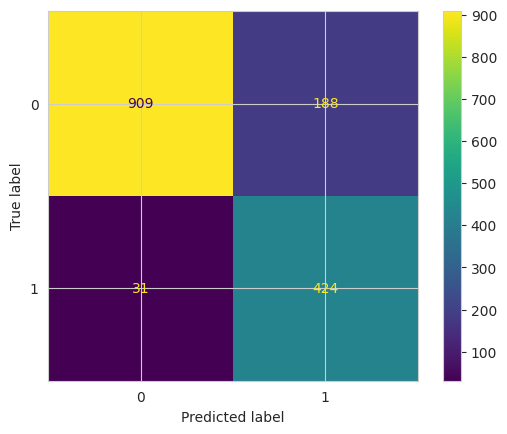

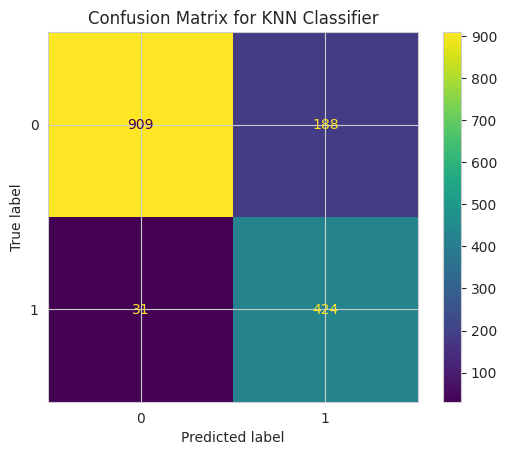

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display the confusion matrix for the KNN model using predictions
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
disp.plot()
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

/tmp/ipython-input-2719135688.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


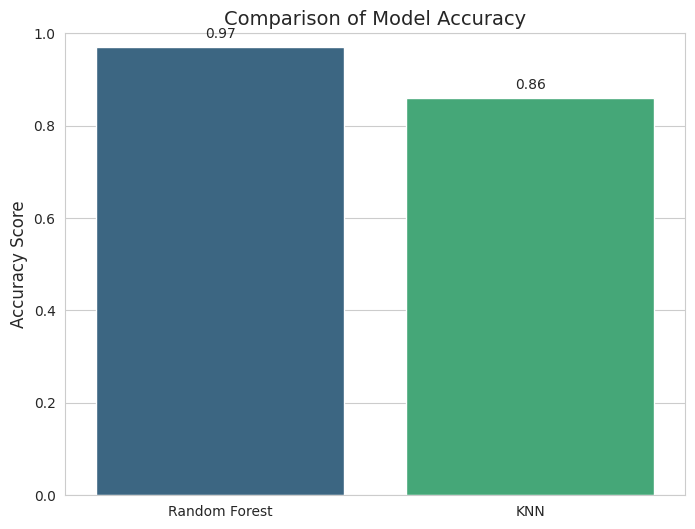

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the accuracy scores for both models
# Replace with your actual variable names if they are different
rf_accuracy = accuracy_score(y_test, y_pred) # Accuracy from Random Forest model
knn_accuracy = accuracy_score(y_test, y_pred_knn) # Accuracy from KNN model

models = ['Random Forest', 'KNN']
accuracy_scores = [rf_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Comparison of Model Accuracy', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1) # Accuracy is between 0 and 1

# Add accuracy values on top of bars
for index, value in enumerate(accuracy_scores):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.show()

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(Model, 'random_forest_model.pkl')

print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl


In [ ]:
import joblib

# Load the trained Random Forest model
loaded_model = joblib.load('random_forest_model.pkl')

print("Random Forest model loaded successfully.")

Random Forest model loaded successfully.


In [58]:
import gradio as gr
import pickle
import os

# Try loading your actual trained model pipeline
if os.path.exists("spam_pipeline.pkl"):
    with open("spam_pipeline.pkl", "rb") as f:
        model = pickle.load(f)
else:
    # Fallback: small demo model
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    texts = [
        "You won a prize! Click here to claim.",
        "Let's meet tomorrow for lunch.",
    ]
    labels = [1, 0]  # 1=Spam, 0=Ham
    vect = TfidfVectorizer()
    X = vect.fit_transform(texts)
    clf = LogisticRegression()
    clf.fit(X, labels)

    class DummyPipeline:
        def predict(self, X_text):
            return clf.predict(vect.transform(X_text))
    model = DummyPipeline()

# Prediction function
def predict_email(text):
    pred = model.predict([text])[0]
    return "Spam" if pred == 1 else "Ham"

# Gradio interface
iface = gr.Interface(
    fn=predict_email,
    inputs=gr.Textbox(lines=10, placeholder="Enter email text here..."),
    outputs="text",
    title="Email Spam/Ham Classifier",
    description="Enter an email and the model will predict whether it's Spam or Ham."
)

iface.launch()



It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7f0536e270d34351fd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **THE END!**